<a href="https://colab.research.google.com/github/Rajath-Manjunath/Classifier1/blob/main/Netflix_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://gist.github.com/singhsidhukuldeep/564f271315abb6bc22647e81e6bf4762/raw/66fb67a8bb014df6b7f924aad0a91aa662bc7fc2/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df1=df[['title','director']].copy()
df1['director']=df1['director'].str.split(',')
df1=df1.explode('director')
df1.head(10)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
6,My Little Pony: A New Generation,José Luis Ucha
7,Sankofa,Haile Gerima
8,The Great British Baking Show,Andy Devonshire


In [4]:
df2=df[['title','cast']].copy()
df2['cast']=df2['cast'].str.split(',')
df2=df2.explode('cast')
df2.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba


In [5]:
df3=df[['title','country']].copy()
df3['country']=df3['country'].str.split(',')
df3=df3.explode('country')
df3.head(10)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India
5,Midnight Mass,NaN
6,My Little Pony: A New Generation,NaN
7,Sankofa,United States
7,Sankofa,Ghana
7,Sankofa,Burkina Faso


In [6]:
df4=df3.merge(df2,on='title',how='inner').merge(df1,on='title',how='inner')
df4.head(30)

,title,country,cast,director
0,Dick Johnson Is Dead,United States,NaN,Kirsten Johnson
1,Blood & Water,South Africa,Ama Qamata,NaN
2,Blood & Water,South Africa,Khosi Ngema,NaN
3,Blood & Water,South Africa,Gail Mabalane,NaN
4,Blood & Water,South Africa,Thabang Molaba,NaN
5,Blood & Water,South Africa,Dillon Windvogel,NaN
6,Blood & Water,South Africa,Natasha Thahane,NaN
7,Blood & Water,South Africa,Arno Greeff,NaN
8,Blood & Water,South Africa,Xolile Tshabalala,NaN
9,Blood & Water,South Africa,Getmore Sithole,NaN


In [7]:
df5=df.drop(['cast','director','country'],axis=1)
df5.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df4=df5.merge(df4,on='title',how='inner')
df4.head(25)

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,NaN,Kirsten Johnson
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,NaN
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,NaN
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Gail Mabalane,NaN
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Thabang Molaba,NaN
5,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Dillon Windvogel,NaN
6,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Natasha Thahane,NaN
7,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Arno Greeff,NaN
8,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Xolile Tshabalala,NaN
9,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Getmore Sithole,NaN


In [9]:
df_final=df4.copy()

In [10]:
df_final.shape

(89415, 12)

In [11]:
df.shape

(8807, 12)

In [12]:
df_final.isnull().sum()

,0
show_id,0
type,0
title,0
date_added,69
release_year,0
rating,38
duration,3
listed_in,0
description,0
country,5421


In [13]:
df_final[df_final['duration'].isna()]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
54486,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",United States,Louis C.K.,Louis C.K.
56628,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,United States,Louis C.K.,Louis C.K.
56696,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,United States,Louis C.K.,Louis C.K.


From the above we can see that the values that should be present in duration is actually present in rating so we will correct this

In [14]:
df_final.loc[df_final['duration'].isna(),'duration']=df_final.loc[df_final['duration'].isna(),'duration'].fillna(df_final['rating'])

In [15]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,69
release_year,0
rating,38
duration,0
listed_in,0
description,0
country,5421


In [16]:
df_final[df_final['show_id']=='s5542']

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
54486,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",United States,Louis C.K.,Louis C.K.


Now convert rating with 'min' in them to NR

In [17]:
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']

,rating
54486,74 min
56628,84 min
56696,66 min


In [18]:
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'

In [19]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,69
release_year,0
rating,38
duration,0
listed_in,0
description,0
country,5421


In [20]:
df_final['rating']=df_final['rating'].fillna('NR')

In [21]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,69
release_year,0
rating,0
duration,0
listed_in,0
description,0
country,5421


In [22]:
#replace nan in cast and director with Unknown
df_final['cast']=df_final['cast'].fillna('Unknown cast')
df_final['director']=df_final['director'].fillna('Unknown director')

In [23]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,69
release_year,0
rating,0
duration,0
listed_in,0
description,0
country,5421


In [24]:
df_final[df_final['date_added'].isna()]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
59283,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",United Kingdom,Daniel Radcliffe,Unknown director
59284,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",United Kingdom,Jon Hamm,Unknown director
59285,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",United Kingdom,Adam Godley,Unknown director
59286,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",United Kingdom,Christopher Godwin,Unknown director
59287,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",United Kingdom,Rosie Cavaliero,Unknown director
...,...,...,...,...,...,...,...,...,...,...,...,...
82317,s8183,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Australia,Luke Jurevicius,Unknown director
82318,s8183,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Australia,Craig Behenna,Unknown director
82319,s8183,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Australia,Charlotte Hamlyn,Unknown director
82320,s8183,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Australia,Stavroula Mountzouris,Unknown director


In [25]:
df_final.loc[df_final['release_year']==2013,'date_added'].mode().values[0]

'April 9, 2019'

In [26]:
df_final.loc[df_final['release_year']==2013,'date_added'].mode().values[0]

'April 9, 2019'

In [27]:
df_final[df_final['date_added'].isna()]['release_year'].unique()

array([2013, 2018, 2003, 2008, 2010, 2012, 2016, 2015])

In [28]:
for i in df_final[df_final['date_added'].isna()]['release_year'].unique():
  print(i,df_final.loc[df_final['release_year']==i,'date_added'].mode().values[0])
  imputer=df_final.loc[df_final['release_year']==i,'date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imputer)

2013 April 9, 2019
2018 August 31, 2018
2003 September 1, 2021
2008 July 1, 2019
2010 January 1, 2020
2012 August 1, 2017
2016 July 15, 2016
2015 October 25, 2015


In [29]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
description,0
country,5421


In [30]:
df_final[df_final['country'].isna()]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
20,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,Sami Bouajila,Julien Leclercq
21,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,Tracy Gotoas,Julien Leclercq
22,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,Samuel Jouy,Julien Leclercq
23,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,Nabiha Akkari,Julien Leclercq
24,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,Sofia Lesaffre,Julien Leclercq
...,...,...,...,...,...,...,...,...,...,...,...,...
89156,s8786,TV Show,YOM,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",NaN,Devyani Dagaonkar,Unknown director
89157,s8786,TV Show,YOM,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",NaN,Ketan Singh,Unknown director
89158,s8786,TV Show,YOM,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",NaN,Mayur Vyas,Unknown director
89159,s8786,TV Show,YOM,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",NaN,Ketan Kava,Unknown director


In [31]:
if df_final.loc[df_final['director']=='Robert Cullen Series','country'].mode().values.size==0:
  print("null")
else:
  print("not null")

null


In [32]:
if df_final.loc[df_final['director']=='Bruno Garotti','country'].mode().values.size==0:
  print("null")
else:
  print("not null")

not null


In [33]:
for i in df_final.loc[df_final['country'].isna(),'director'].unique():
  print(i,df_final.loc[df_final['director']==i,'country'].mode().values)

Julien Leclercq ['France']
Unknown director ['United States']
Mike Flanagan ['United States']
Robert Cullen []
 José Luis Ucha []
Kongkiat Komesiri []
Bruno Garotti ['Brazil']
Pedro de Echave García []
 Pablo Azorín Williams []
Adam Salky []
Olivier Megaton ['United States']
K.S. Ravikumar []
Alex Woo ['United States']
 Stanley Moore ['United States']
Rajiv Menon ['India']
Ashwiny Iyer Tiwari ['India']
 Abhishek Chaubey []
 Saket Chaudhary []
Daniel Sandu []
Cédric Jimenez []
Tyler Greco []
Bunmi Ajakaiye ['South Africa']
David Yarovesky []
Hanns-Bruno Kammertöns []
 Vanessa Nöcker []
 Michael Wech []
David A. Vargas []
Ben Simms ['United States']
Prakash Satam []
Delhiprasad Deenadayalan []
Tomer Eshed []
Thomas Sieben ['Germany']
Marcus Clarke []
Alexis Almström []
Jason Hehir []
Yemi Amodu []
Luis Alfaro []
 Javier Gómez Santander []
Sara Colangelo [' Canada' ' Israel' ' United Kingdom' 'United States']
Stephen Herek [' Canada' 'United States']
JP Habac ['Philippines']
Gilles Paquet

In [34]:
for i in df_final.loc[df_final['country'].isna(),'director'].unique():
  if df_final.loc[df_final['director']==i,'country'].mode().values.size==0:
    continue
  else:
    imputer=df_final.loc[df_final['director']==i,'country'].mode().values[0]
    df_final.loc[df_final['director']==i,'country']=df_final.loc[df_final['director']==i,'country'].fillna(imputer)

In [35]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
description,0
country,2124


In [36]:
for i in df_final.loc[df_final['country'].isna(),'cast'].unique():
  if df_final.loc[df_final['cast']==i,'country'].mode().values.size==0:
    continue
  else:
    imputer=df_final.loc[df_final['cast']==i,'country'].mode().values[0]
    df_final.loc[df_final['cast']==i,'country']=df_final.loc[df_final['cast']==i,'country'].fillna(imputer)

In [37]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
description,0
country,1060


In [38]:
df_final[df_final['country'].isna()]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
138,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Sukollawat Kanarot,Kongkiat Komesiri
140,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Pavarit Mongkolpisit,Kongkiat Komesiri
142,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Suthipongse Thatphithakkul,Kongkiat Komesiri
143,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Bhasaworn Bawronkirati,Kongkiat Komesiri
144,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Daweerit Chullasapya,Kongkiat Komesiri
...,...,...,...,...,...,...,...,...,...,...,...,...
87277,s8603,Movie,Tom and Jerry: The Magic Ring,"December 15, 2019",2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...,NaN,Dana Hill,Phil Roman
87278,s8603,Movie,Tom and Jerry: The Magic Ring,"December 15, 2019",2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...,NaN,Anndi McAfee,Phil Roman
87280,s8603,Movie,Tom and Jerry: The Magic Ring,"December 15, 2019",2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...,NaN,Rip Taylor,Phil Roman
88484,s8719,Movie,Westside vs. the World,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...,NaN,Louie Simmons,Michael Fahey


In [39]:
df_final[df_final['title']=='Bangkok Breaking']

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
138,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Sukollawat Kanarot,Kongkiat Komesiri
139,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",Thailand,Sushar Manaying,Kongkiat Komesiri
140,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Pavarit Mongkolpisit,Kongkiat Komesiri
141,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",Thailand,Sahajak Boonthanakit,Kongkiat Komesiri
142,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Suthipongse Thatphithakkul,Kongkiat Komesiri
143,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Bhasaworn Bawronkirati,Kongkiat Komesiri
144,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Daweerit Chullasapya,Kongkiat Komesiri
145,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",Thailand,Waratthaya Wongchayaporn,Kongkiat Komesiri
146,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Kittiphoom Wongpentak,Kongkiat Komesiri
147,s12,TV Show,Bangkok Breaking,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",NaN,Abhicha Thanachanun,Kongkiat Komesiri


In [40]:
for i in df_final.loc[df_final['country'].isna(),'title'].unique():
  if df_final.loc[df_final['title']==i,'country'].mode().values.size==0:
    continue
  else:
    print(i,df_final.loc[df_final['title']==i,'country'].mode().values[0])
    imputer=df_final.loc[df_final['title']==i,'country'].mode().values[0]
    df_final.loc[df_final['title']==i,'country']=df_final.loc[df_final['title']==i,'country'].fillna(imputer)

Bangkok Breaking Thailand
Intrusion United States
Avvai Shanmughi India
The Stronghold France
Nightbooks United States
A StoryBots Space Adventure United States
Little Singham - Black Shadow India
Tughlaq Durbar India
Tughlaq Durbar (Telugu) India
Firedrake the Silver Dragon  United States
JJ+E Sweden
Shadow Parties Nigeria
Barbie Big City Big Dreams United States
HQ Barbers Nigeria
SAS: Rise of the Black Swan United Kingdom
The Witcher: Nightmare of the Wolf United States
Gunshot Egypt
Man in Love Taiwan
The Loud House Movie United States
A Faraway Land Philippines
Black Island  Czech Republic
Nneka The Pretty Serpent Nigeria
Out of my league Italy
I missed you: Director's Cut Taiwan
The Vault Spain
I'm Glad I Did Turkey
Rurouni Kenshin: The Beginning Japan
The Last Mercenary France
Resort to Love United States
Blood Red Sky United States
Chhota Bheem - Dinosaur World India
Chhota Bheem in African Safari India
Chhota Bheem Ka Roosi Romanch India
Words Bubble Up Like Soda Pop Japan
Tro

In [41]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
description,0
country,230


In [42]:
for i in df_final[df_final['country'].isna()]['director'].unique():
  if df_final.loc[df_final['director']==i,'country'].mode().values.size==0:
    continue
  else:
    print("present")

present


In [43]:
for i in df_final[df_final['country'].isna()]['cast'].unique():
  if df_final.loc[df_final['cast']==i,'country'].mode().values.size==0:
    continue
  else:
    print("present")

present
present
present


In [44]:
for i in df_final[df_final['country'].isna()]['title'].unique():
  if df_final.loc[df_final['title']==i,'country'].mode().values.size==0:
    continue
  else:
    print("present")

In [45]:
df_final[df_final['title']=='Homeland']['cast'].values

array(['Parambrata Chatterjee', ' Ani Hovhannisyan',
       ' Jonathan Dumontier', ' Varzu', ' Sylvie de Neef',
       ' Prakashchandra Roy', ' Nicolas Pierson', ' Anahit Simonyan'],
      dtype=object)

In [46]:
df_final[df_final['cast']=='Anahit Simonyan']

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director


In [47]:
df_final.isna().sum()

,0
show_id,0
type,0
title,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
description,0
country,230


In [48]:
df_final[df_final['country'].isna()]['title'].unique().tolist()

['The Father Who Moves Mountains',
 'Schumacher',
 'Blood Brothers: Malcolm X & Muhammad Ali',
 'Boomika',
 'Boomika (Hindi)',
 'Boomika (Malayalam)',
 'Boomika (Telugu)',
 'I Need Romance',
 'Takizawa Kabuki ZERO 2020 The Movie',
 'Shiny_Flakes: The Teenage Drug Lord',
 'Hostage House',
 'Plastic Cup Boyz: Laughing My Mask Off!',
 'African America',
 'The Unknown Saint',
 'Private Network: Who Killed Manuel Buendía?',
 'The Guide to the Perfect Family',
 'The Stand-Up',
 'The Tour',
 'Major Grom: Plague Doctor',
 'Legend\xa0of\xa0Exorcism',
 'Into the Wind',
 'Word of Honor',
 'Strain',
 'Legal Hash',
 'Perfume Imaginary Museum “Time Warp”',
 'Reframe THEATER EXPERIENCE with you',
 "Wave of Cinema: 90's Generation",
 'A Perfect Day For Arsenide',
 'Connected',
 'Ratones Paranoicos: The Band that Rocked Argentina',
 'Dr Jason Leong Hashtag Blessed',
 'Wonho Chung: Live in New York',
 'Tumi or not Tumi',
 'PNL - Dans la légende tour',
 'El límite infinito',
 'GEN HOSHINO STADIUM TOUR “P

In [49]:
df_final[df_final['country']=='India']

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
30,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,Mayur More,Unknown director
31,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,Jitendra Kumar,Unknown director
32,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,Ranjan Raj,Unknown director
33,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,Alam Khan,Unknown director
34,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,Ahsaas Channa,Unknown director
...,...,...,...,...,...,...,...,...,...,...,...,...
89410,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Manish Chaudhary,Mozez Singh
89411,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Meghna Malik,Mozez Singh
89412,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Malkeet Rauni,Mozez Singh
89413,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Anita Shabdish,Mozez Singh


In [50]:
df6=df_final.copy()

In [51]:
df6['country']=df6['country'].fillna('Unknown Country')

In [52]:
df6.isna().sum()

,0
show_id,0
type,0
title,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
description,0
country,0


In [53]:
df6.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,country,cast,director
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown director
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown director
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Gail Mabalane,Unknown director
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Thabang Molaba,Unknown director


In [54]:
#Create a column genre using listed_in
df6['genre']=df6['listed_in'].str.split(',')
df6=df6.explode('genre')

In [55]:
df6=df6.drop('listed_in',axis=1)
df6.head()

,show_id,type,title,date_added,release_year,rating,duration,description,country,cast,director,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown director,International TV Shows
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown director,TV Dramas
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown director,TV Mysteries
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown director,International TV Shows


In [56]:
for i in df6.columns:
  print(i,len(df6[i].unique().tolist()))

show_id 8807
type 2
title 8807
date_added 1767
release_year 74
rating 14
duration 220
description 8775
country 198
cast 39297
director 5121
genre 73


In [57]:
df6['director']=df6['director'].str.replace(r"^ +| +$", r"",regex=True)

Explanation for the regex:

^ is line start
(space and plus, +) is one or more spaces
| is or
$ is line end.


So it searches for leading (line start and spaces) and trailing (spaces and line end) spaces and replaces them with an empty string.

In [58]:
df6['cast']=df6['cast'].str.replace(r"^ +| +$", r"",regex=True)
df6['title']=df6['title'].str.replace(r"^ +| +$",r"",regex=True)

Univariate Analysis

In [59]:
# Number of movies each genre has
df6.groupby('genre')['title'].nunique().sort_values(ascending=False)
# The highest number of movies are International Movies followed by Dramas and Comedies
# the lowest number of movies belong to genre Sports Movies, LGBTQ Movies, TV Sci-Fi & Fantasy

,title
genre,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
TV Sci-Fi & Fantasy,1


In [61]:
df6.groupby('country')['title'].nunique().sort_values(ascending=False)
# United States has given highest number of movies followed by India

,title
country,
United States,3764
India,1093
United Kingdom,650
United States,490
Japan,278
...,...
Guatemala,1
Ghana,1
Paraguay,1


In [62]:
df6.groupby('release_year')['title'].nunique().sort_values(ascending=False)
# 2018 has given the highest number of movies followed by 2017 and then 2016

,title
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1961,1
1947,1


In [63]:
df6.groupby('rating')['title'].nunique().sort_values(ascending=False)
# TV-MA rating has the highest number of movies followed by TV-14

,title
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [70]:
df6['type'].value_counts()
# there are more movies compared to TV Show

,count
type,
Movie,145917
TV Show,56148


In [69]:
df6.head()

,show_id,type,title,date_added,release_year,rating,duration,description,country,cast,director,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Unknown cast,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown director,International TV Shows
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown director,TV Dramas
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Ama Qamata,Unknown director,TV Mysteries
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,Khosi Ngema,Unknown director,International TV Shows


In [72]:
df6.groupby('rating')['title'].nunique().sort_values(ascending=False).index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR'],
      dtype='object', name='rating')

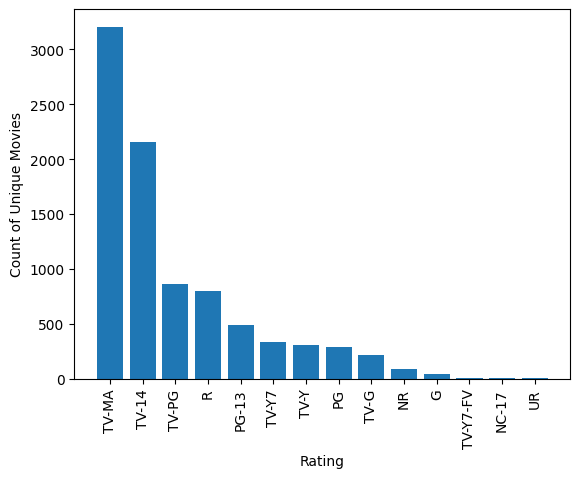

In [75]:
import matplotlib.pyplot as plt
plt.bar(df6.groupby('rating')['title'].nunique().sort_values(ascending=False).index,df6.groupby('rating')['title'].nunique().sort_values(ascending=False))
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Count of Unique Movies')
plt.show()

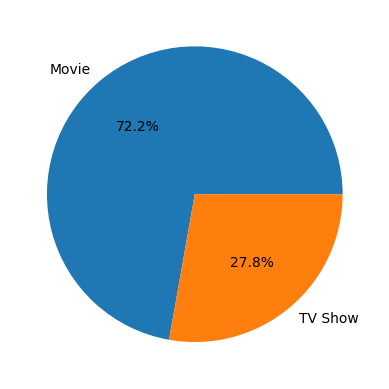

In [77]:
plt.pie(df6['type'].value_counts(),labels=df6['type'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [78]:
df6.groupby('cast')['title'].nunique().sort_values(ascending=False)[:15]
# Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah have acted in the most number of movies

,title
cast,
Unknown cast,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30


In [88]:
df6.groupby('director')['title'].nunique().sort_values(ascending=False)[:15]
# Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah have acted in the most number of movies

,title
director,
Unknown director,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12


#What type of content is available in different countries?

In [90]:
df6.groupby(['country','genre'])['title'].nunique().sort_values(ascending=False)[:15]

country        genre                   
India           International Movies       836
United States  Documentaries               476
               Dramas                      437
India          Dramas                      415
United States  Comedies                    387
               Children & Family Movies    376
               Action & Adventure          334
                Independent Movies         319
India          Comedies                    274
United States   Comedies                   255
India           Dramas                     254
United States   Dramas                     248
               Kids' TV                    248
                TV Dramas                  243
               Stand-Up Comedy             228
Name: title, dtype: int64

How has the number of movies released per year changed over the last 20-30 years?

In [91]:
df6[df6['release_year']>=1995].groupby('release_year')['title'].nunique().sort_values(ascending=False)

,title
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


Comparison of tv shows vs. movies.

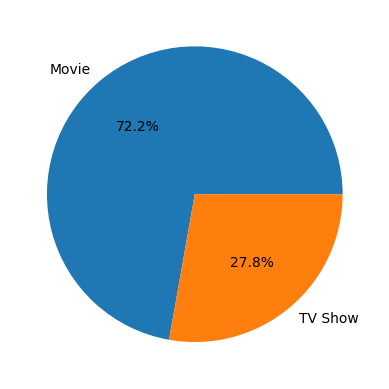

In [92]:
plt.pie(df6['type'].value_counts(),labels=df6['type'].value_counts().index,autopct='%1.1f%%')
plt.show()

What is the best time to launch a TV show?

In [98]:
df6['type'].value_counts()

,count
type,
Movie,145917
TV Show,56148


In [99]:
df_temp=df6[df6['type']=='TV Show'].groupby('release_year')['title'].nunique().sort_values(ascending=False)[:30]
df_temp
# It seems 2020 had the most number of TV show released so this would be a good time to release a new show

,title
release_year,
2020,436
2019,397
2018,380
2021,315
2017,265
2016,244
2015,162
2014,88
2012,64


Does Netflix has more focus on TV Shows than movies in recent years

In [100]:
df6[df6['release_year']>=2010].groupby('type')['title'].nunique()
# In the last 15 years Netflix has focussed more on Movie compared to TV Show

,title
type,
Movie,4978
TV Show,2494


Analysis of actors/directors of different types of shows/movies.

In [117]:
df6[(df6['type']=='Movie')&(df6['director']!='Unknown director')&(df6['cast']!='Unknown cast')].groupby(['cast','director'])['title'].nunique().sort_values(ascending=False)[:30]
# Director Rajiv Chailaka, Actor Julie Tejwani has the highest combination in Movie

,,title
cast,director,
Julie Tejwani,Rajiv Chilaka,19
Rajesh Kava,Rajiv Chilaka,19
Rupa Bhimani,Rajiv Chilaka,18
Jigna Bhardwaj,Rajiv Chilaka,18
Vatsal Dubey,Rajiv Chilaka,16
Swapnil,Rajiv Chilaka,13
Mousam,Rajiv Chilaka,13
Saurav Chakraborty,Suhas Kadav,8
Kumiko Watanabe,Toshiya Shinohara,7


In [115]:
df6[(df6['type']=='TV Show')&(df6['director']!='Unknown director')&(df6['cast']!='Unknown cast')].groupby(['cast','director'])['title'].nunique().sort_values(ascending=False)[:30]
# Director Alastair Fothergill, Actor David Attenborough has the highest combination in TV Show

,,title
cast,director,
David Attenborough,Alastair Fothergill,3
Lee Il-hwa,Shin Won-ho,2
Dave Chappelle,Stan Lathan,2
Gautham Vasudev Menon,Gautham Vasudev Menon,2
Prakash Raj,Gautham Vasudev Menon,2
Anjali,Gautham Vasudev Menon,2
Sung Dong-il,Shin Won-ho,2
Nur Sürer,Seren Yüce,1
Numthip Jongrachatawiboon,Sivaroj Kongsakul,1
